Optimize TRIX and STO RSI indicators

In [1]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


<h1>Load yours data</h1>

In [3]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

client = Client(tld='us')

pairName = "ETHUSDT"
startDate = '2020-10-15'
endDate = '2021-11-15'
timeInterval = Client.KLINE_INTERVAL_1HOUR

klinesT = client.get_historical_klines(pairName, timeInterval, startDate, endDate)

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']
#df

<h1>Define indicators</h1>

In [4]:
df.drop(df.columns.difference(['open','high','low','close','volume']), axis=1, inplace=True)

df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
trixLength = 7
trixSignal = 15
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']

df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=13, smooth1=3, smooth2=3)
stochTop = 0.82
stochBottom = 0.28

print("Indicators loaded 100%")

df

Indicators loaded 100%


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2020-10-15 00:00:00,378.73,378.73,377.01,377.67,1.36401000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 01:00:00,377.54,378.60,376.63,377.60,7.35822000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 02:00:00,377.71,377.71,375.56,375.57,16.02430000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 03:00:00,375.80,376.41,375.80,376.41,1.86141000,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-15 04:00:00,376.82,377.65,375.60,377.15,2.80921000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-14 20:00:00,4544.96,4559.46,4535.20,4553.16,65.58417000,4628.589450,4596.301869,-0.124208,-0.076700,-0.047509,0.446654
2021-11-14 21:00:00,4549.08,4592.91,4542.01,4571.12,172.44779000,4628.017615,4591.058657,-0.114075,-0.083014,-0.031060,0.755572
2021-11-14 22:00:00,4576.77,4597.94,4570.42,4574.81,26.93601000,4627.488186,4586.580310,-0.097545,-0.087215,-0.010330,0.816886


<h1>1 RSI parameter optimizer</h1>

Loading... 23 / 23


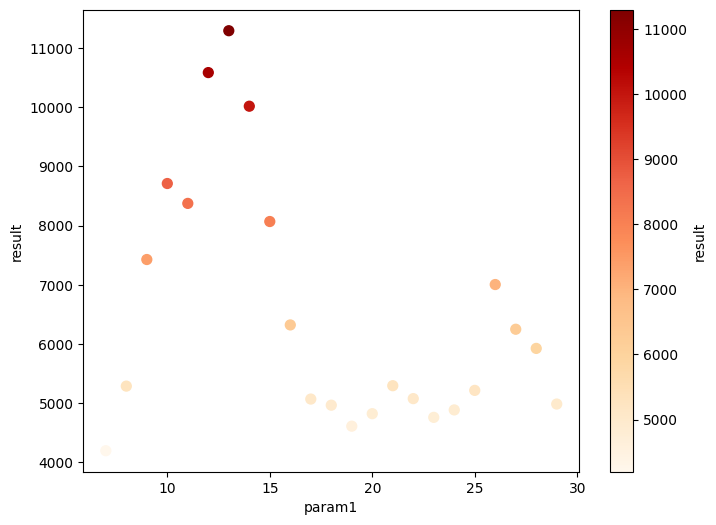

   param1        result
0       7   4198.779026
12     19   4613.482756
16     23   4762.360163
13     20   4824.480293
17     24   4887.979961
11     18   4967.816862
22     29   4987.191619
10     17   5071.262244
15     22   5078.836842
18     25   5217.840467
1       8   5289.944842
14     21   5296.930823
21     28   5926.929721
20     27   6250.571016
9      16   6323.312312
19     26   7005.712849
2       9   7428.181634
8      15   8069.970080
4      11   8376.089082
3      10   8711.918427
7      14  10017.491435
5      12  10585.438925
6      13  11292.472130


In [5]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

dfTest = df.copy()

def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,30,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  clear_output(wait=True)
  count += 1
  print("Loading...",count,'/',maxCount)
  usdt = 1000
  coin = 0

  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row) and usdt > 0:
      coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
      coin = 0

  myrow = {'param1': i,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  myrow_df = pd.DataFrame([myrow])
  dt = pd.concat([dt, myrow_df], ignore_index=True)

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>2 trix length and signal optimization</h1>


Loading... 40 / 40


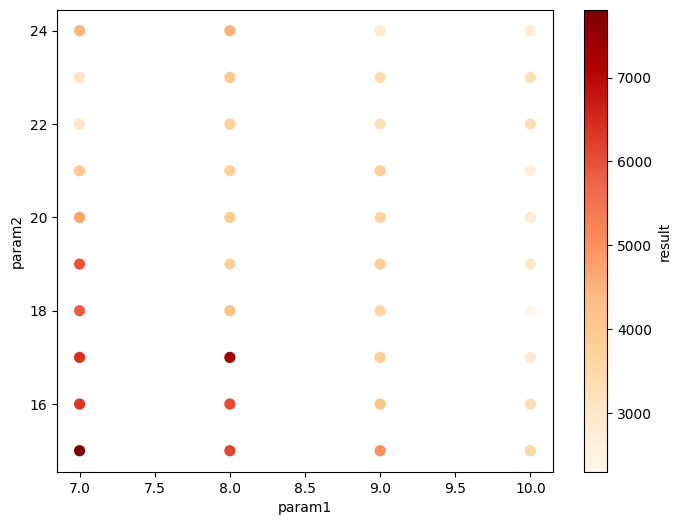

   param1 param2       result
33     10     18  2299.493433
36     10     21  2673.124188
39     10     24  2766.768760
32     10     17  2802.387249
35     10     20  2811.230253
29      9     24  2902.140825
34     10     19  2925.358972
7       7     22  3046.193037
8       7     23  3115.572490
27      9     22  3211.855843
31     10     16  3287.531585
38     10     23  3290.866242
37     10     22  3301.932337
28      9     23  3431.712093
30     10     15  3548.386343
23      9     18  3642.005457
25      9     20  3684.221851
14      8     19  3755.236510
17      8     22  3763.899039
16      8     21  3805.903879
24      9     19  3825.758217
26      9     21  3841.603860
22      9     17  3854.000478
15      8     20  3893.309809
18      8     23  3962.443072
6       7     21  4005.762012
21      9     16  4081.658929
13      8     18  4205.467662
9       7     24  4453.484399
19      8     24  4526.452271
5       7     20  4714.150586
20      9     15  5026.511806
3       7 

In [6]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

dfTest = df['2021-01-01':]

def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,11,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [15,25,1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'],trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row) and usdt > 0:
        coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>3 overbought and oversold STO RSI level</h1>

In [7]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'param3', 'result'])

# dfTest = df.copy()

dfTest = df['2021-01-01':]

def buyCondition(row, param):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < param:
    return True
  else:
    return False

def sellCondition(row, param):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > param:
    return True
  else:
    return False

loopI = [70,90,3]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10,30,3]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

loopK = [12,16,1]
enumK = ceil((loopK[1] - loopK[0]) / loopK[2])

count = 0
maxCount = enumI * enumJ * enumK
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    for k in range(loopK[0], loopK[1], loopK[2]):
      clear_output(wait=True)
      count += 1
      print("Loading...",count,'/',maxCount)
      usdt = 1000
      coin = 0

      trixLength = i
      trixSignal = j
      dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)

      for index, row in dfTest.iterrows():
        #BUY
        if buyCondition(row, i/100) and usdt > 0:
          coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
          usdt = 0

        #SELL
        elif sellCondition(row, j/100) and coin > 0:
          usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
          coin = 0

      myrow = {'param1': i, 'param2': j, 'param3': k,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
      myrow_df = pd.DataFrame([myrow])
      dt = pd.concat([dt, myrow_df], ignore_index=True)

"""
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dt['param1'], dt['param2'], dt['param3'], s=30, c=dt['result'])
plt.show()
"""
print(dt.sort_values(by=['result']))

Loading... 196 / 196


C:\Users\antoi\AppData\Local\Temp\ipykernel_14536\272442416.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)


    param1 param2 param3       result
7       70     13     15  2781.703205
35      73     13     15  2790.494978
3       70     10     15  2807.968526
31      73     10     15  2811.024689
63      76     13     15  3152.149179
..     ...    ...    ...          ...
76      76     25     12  7179.698186
108     79     28     12  7253.553516
80      76     28     12  7274.955566
133     82     25     13  7461.291790
137     82     28     13  7728.368358

[196 rows x 4 columns]


In [8]:
def plot_wallet_vs_asset(df_days, log=False):
    days = df_days.copy()
    fig, ax_left = plt.subplots(figsize=(15, 20), nrows=4, ncols=1)

    ax_left[0].title.set_text("Wallet evolution")
    ax_left[0].plot(days['wallet'], color='royalblue', lw=1)
    if log:
        ax_left[0].set_yscale('log')
    ax_left[0].fill_between(days['wallet'].index, days['wallet'], alpha=0.2, color='royalblue')
    ax_left[0].axhline(y=days.iloc[0]['wallet'], color='black', alpha=0.3)
    ax_left[0].legend(['Wallet evolution'], loc ="upper left")

    ax_left[1].title.set_text("Asset evolution")
    ax_left[1].plot(days['price'], color='sandybrown', lw=1)
    if log:
        ax_left[1].set_yscale('log')
    ax_left[1].fill_between(days['price'].index, days['price'], alpha=0.2, color='sandybrown')
    ax_left[1].axhline(y=days.iloc[0]['price'], color='black', alpha=0.3)
    ax_left[1].legend(['Asset evolution'], loc ="upper left")

    ax_left[2].title.set_text("Drawdown curve")
    ax_left[2].plot(-days['drawdown_pct']*100, color='indianred', lw=1)
    ax_left[2].fill_between(days['drawdown_pct'].index, -days['drawdown_pct']*100, alpha=0.2, color='indianred')
    ax_left[2].axhline(y=0, color='black', alpha=0.3)
    ax_left[2].legend(['Drawdown in %'], loc ="lower left")

    ax_right = ax_left[3].twinx()
    if log:
        ax_left[3].set_yscale('log')
        ax_right.set_yscale('log')

    ax_left[3].title.set_text("Wallet VS Asset (not on the same scale)")
    ax_left[3].set_yticks([])
    ax_right.set_yticks([])
    ax_left[3].plot(days['wallet'], color='royalblue', lw=1)
    ax_right.plot(days['price'], color='sandybrown', lw=1)
    ax_left[3].legend(['Wallet evolution'], loc ="lower right")
    ax_right.legend(['Asset evolution'], loc ="upper left")

<h1>RUN the Spot Backtest</h1>

In [11]:
dfTest = None
dfTest = df.copy()

dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])
days_history = []
previous_day = 0

usdt = 1000
makerFee = 0.0002
takerFee = 0.0007

initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 999999
buyReady = True
sellReady = True

def buyCondition(row, previousRow):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

def sellCondition(row, previousRow):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

for index, row in dfTest.iterrows():
  #Keep track of the evolution of our portfolio each day for later analysis
  current_day = index.day
  if previous_day != current_day:
      temp_wallet = wallet
      if coin > 0:
          temp_wallet = coin*row['close']
      days_history.append({
          "day":str(index.year)+"-"+str(index.month)+"-"+str(index.day),
          "wallet":temp_wallet,
          "price":row['close']})
  previous_day = current_day

  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    buyPrice = row['close']

    # stopLoss = buyPrice - 0.02 * buyPrice
    # takeProfit = buyPrice + 0.04 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    if wallet > lastAth:
      lastAth = wallet
    # print("Buy COIN at",buyPrice,'$ the', index)

    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  elif row['low'] < stopLoss and coin > 0:
    sellPrice = stopLoss
    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False #Need the sell condition is triggered to buy again
    wallet = usdt

    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    if wallet > lastAth:
      lastAth = wallet
    # print("Sell COIN at",sellPrice,'$ the', index)


    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    myrow_df = pd.DataFrame([myrow])
    dt = pd.concat([dt, myrow_df], ignore_index=True)

  previousRow = row

df_days = pd.DataFrame(days_history)
df_days['day'] = pd.to_datetime(df_days['day'])
df_days = df_days.set_index(df_days['day'])
df_days['wallet_ath'] = df_days['wallet'].cummax()
df_days['drawdown'] = df_days['wallet_ath'] - df_days['wallet']
df_days['drawdown_pct'] = df_days['drawdown'] / df_days['wallet_ath']
# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum() / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("There is no Good or Bad trades in the backTest")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/ dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("There is no Good trades in the backTest")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum() / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("There is no Bad trades in the backTest")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

C:\Users\antoi\AppData\Local\Temp\ipykernel_14536\3903393024.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dt = pd.concat([dt, myrow_df], ignore_index=True)


,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2020-10-16 19:00:00,2020-10-16 19:00:00,Buy,Buy Market Order,367.30,0.001906,0,2.720664,999.300000,0.000000,NaN,NaN,
2020-10-17 18:00:00,2020-10-17 18:00:00,Sell,Sell Market Order,366.97,0.698882,997.703299,0.000000,997.703299,-0.001598,-1.596701,-0.159782,Bad
2020-10-18 02:00:00,2020-10-18 02:00:00,Buy,Buy Market Order,368.76,0.001894,0,2.703669,997.004907,-0.002297,NaN,NaN,
2020-10-18 21:00:00,2020-10-18 21:00:00,Sell,Sell Market Order,376.51,0.712571,1017.245769,0.000000,1017.245769,0.000000,20.240862,2.030167,Good
2020-10-19 14:00:00,2020-10-19 14:00:00,Buy,Buy Market Order,378.40,0.001882,0,2.686400,1016.533697,-0.000700,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12 01:00:00,2021-11-12 01:00:00,Sell,Sell Market Order,4783.92,8.049280,11490.92263,0.000000,11490.922630,-0.066628,176.696907,1.561723,Good
2021-11-12 22:00:00,2021-11-12 22:00:00,Buy,Buy Market Order,4637.33,0.001735,0,2.476183,11482.878984,-0.067282,NaN,NaN,
2021-11-13 10:00:00,2021-11-13 10:00:00,Sell,Sell Market Order,4613.92,7.997438,11416.914096,0.000000,11416.914096,-0.072640,-65.964889,-0.574463,Bad


<h1>Print Complete BackTest Analyses</h1>

Pair Symbol : ETHUSDT
Period : [2020-10-15 00:00:00] -> [2021-11-15 00:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 11292.47 $
Performance vs US Dollar : 1029.25 %
Buy and Hold Performence : 1138.03 %
Performance vs Buy and Hold : -9.56 %
Best trade : +28.67 %, the 2021-05-25 00:00:00
Worst trade : -14.94 %, the 2021-02-23 09:00:00
Worst drawBack : -27.0 %
Total fees :  1358.28 $

----- Trades Informations -----
Total trades on period : 337
Number of positive trades : 186
Number of negative trades :  151
Trades win rate ratio : 55.19 %
Average trades performance : 0.87 %
Average positive trades : 3.28 %
Average negative trades : -2.09 %

----- Trades Reasons -----
Buy Market Order number : 337
Sell Market Order number : 337


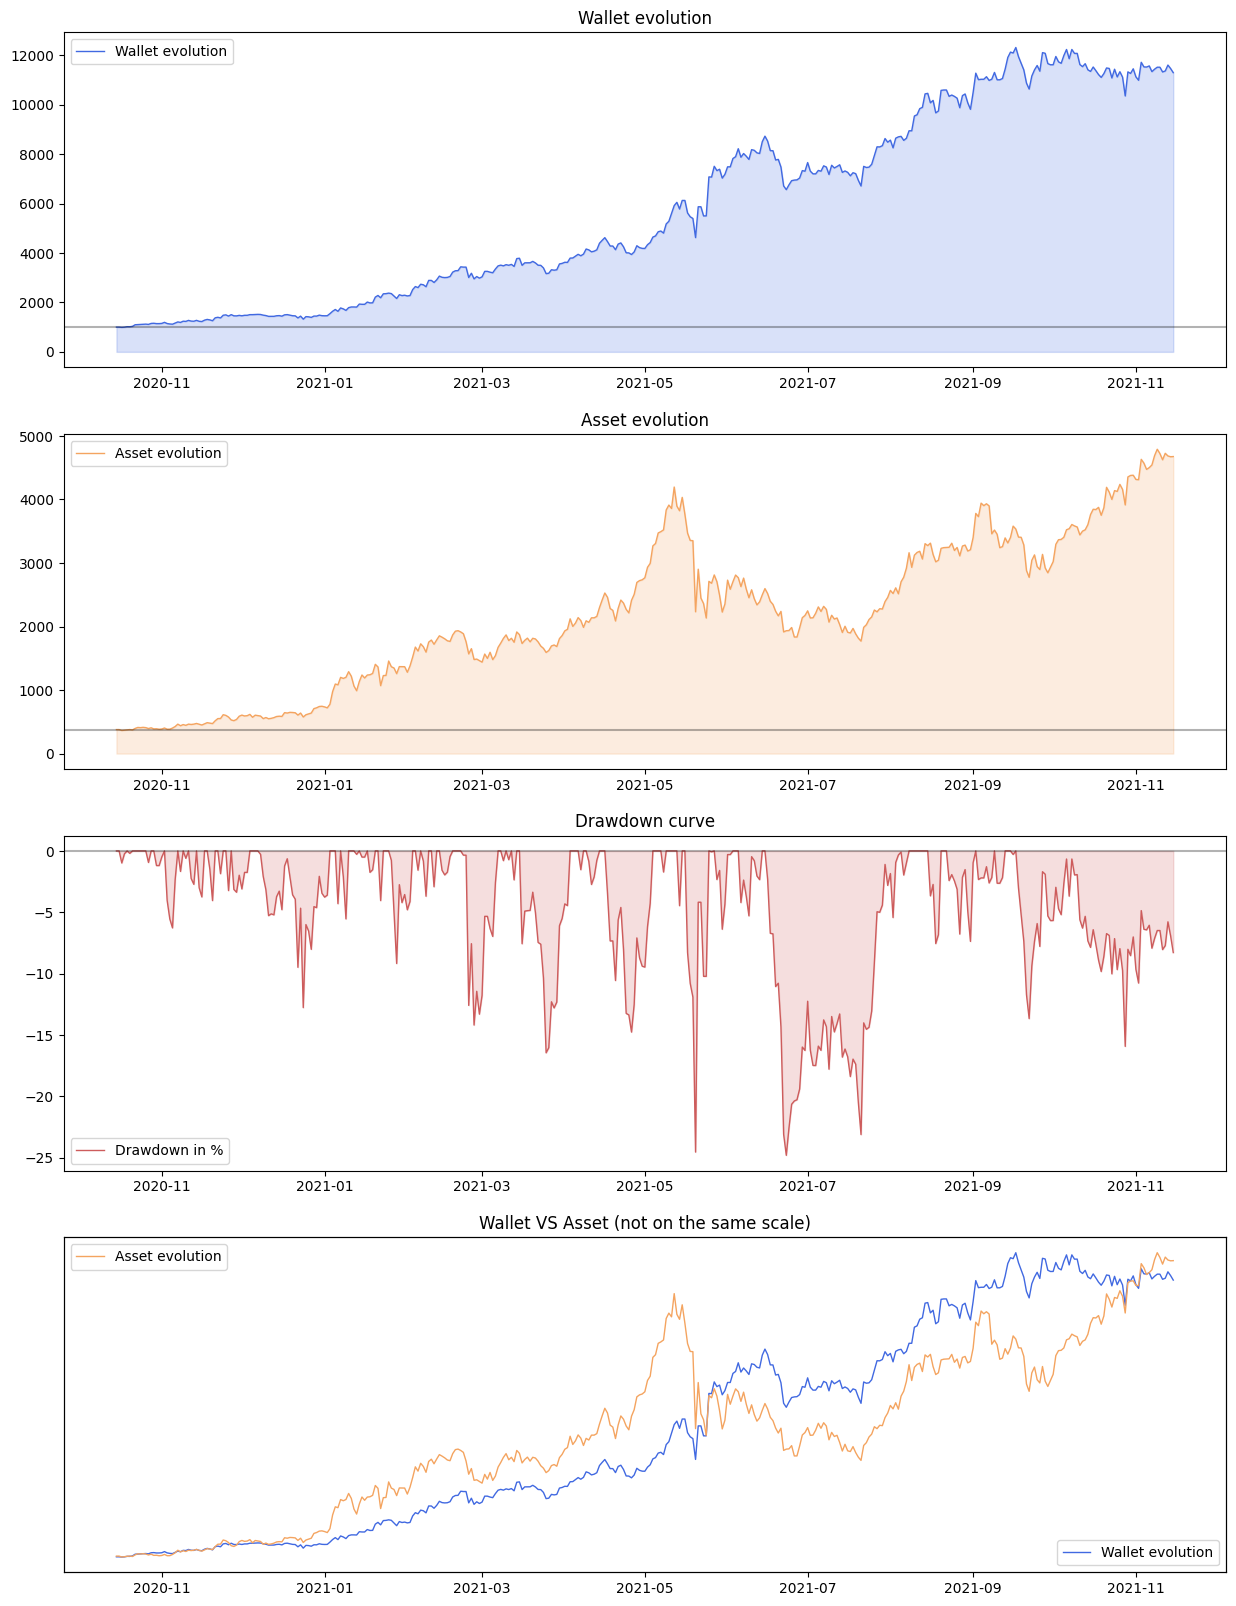

In [12]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

plot_wallet_vs_asset(df_days)